In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import os

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3)
formatter = ticker.ScalarFormatter(useMathText=True)

In [94]:
manila = pd.read_csv('manila_baseline/measures.csv')
our = pd.read_csv('our_approach/measures.csv')

In [95]:
manila_time = pd.read_fwf('manila_baseline/times.txt', header=None)
manila["time"] = manila_time

In [96]:
our_time = pd.read_fwf('our_approach/times.txt', header=None)
our['time'] = our_time

In [97]:
manila['approach'] = 'Manila'
our['approach'] = 'Our approach'

In [98]:
full = pd.concat([manila, our])

In [99]:
full

,label,timestamp,duration,pkg,dram,socket,time,approach
0,bar,1.708449e+09,1.517328e+05,3581716.0,78552.0,0,0.151729,Manila
1,bar,1.708449e+09,4.879537e+05,10208775.0,163207.0,0,0.487949,Manila
2,bar,1.708449e+09,9.572183e+04,2507378.0,70618.0,0,0.095718,Manila
3,bar,1.708449e+09,8.048866e+04,1655880.0,61523.0,0,0.080486,Manila
4,bar,1.708449e+09,1.532336e+07,370795071.0,29013598.0,0,15.323353,Manila
...,...,...,...,...,...,...,...,...
455,bar,1.708449e+09,1.748198e+04,341613.0,7690.0,0,0.017480,Our approach
456,bar,1.708449e+09,1.173531e+05,2608514.0,272216.0,0,0.117351,Our approach
457,bar,1.708449e+09,1.809481e+04,574644.0,10681.0,0,0.018091,Our approach
458,bar,1.708449e+09,1.267146e+05,2785881.0,152282.0,0,0.126712,Our approach


## CPU Consumption

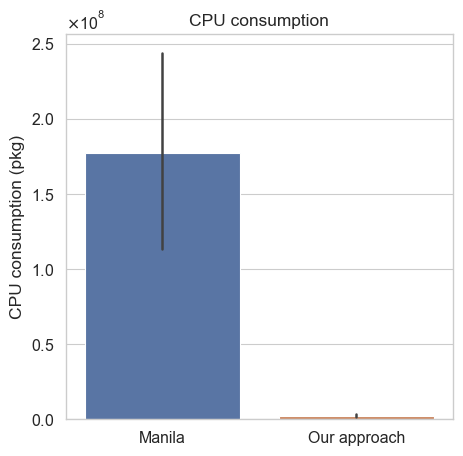

In [100]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=full, x='approach', y='pkg', hue='approach', ax=ax)
ax.set_ylabel('CPU consumption (pkg)')
ax.set_xlabel('')
ax.yaxis.set_major_formatter(formatter)
plt.title('CPU consumption')
plt.savefig('pkg.png', dpi=300, bbox_inches='tight')
plt.show()

## Execution time

In [101]:
full

,label,timestamp,duration,pkg,dram,socket,time,approach
0,bar,1.708449e+09,1.517328e+05,3581716.0,78552.0,0,0.151729,Manila
1,bar,1.708449e+09,4.879537e+05,10208775.0,163207.0,0,0.487949,Manila
2,bar,1.708449e+09,9.572183e+04,2507378.0,70618.0,0,0.095718,Manila
3,bar,1.708449e+09,8.048866e+04,1655880.0,61523.0,0,0.080486,Manila
4,bar,1.708449e+09,1.532336e+07,370795071.0,29013598.0,0,15.323353,Manila
...,...,...,...,...,...,...,...,...
455,bar,1.708449e+09,1.748198e+04,341613.0,7690.0,0,0.017480,Our approach
456,bar,1.708449e+09,1.173531e+05,2608514.0,272216.0,0,0.117351,Our approach
457,bar,1.708449e+09,1.809481e+04,574644.0,10681.0,0,0.018091,Our approach
458,bar,1.708449e+09,1.267146e+05,2785881.0,152282.0,0,0.126712,Our approach


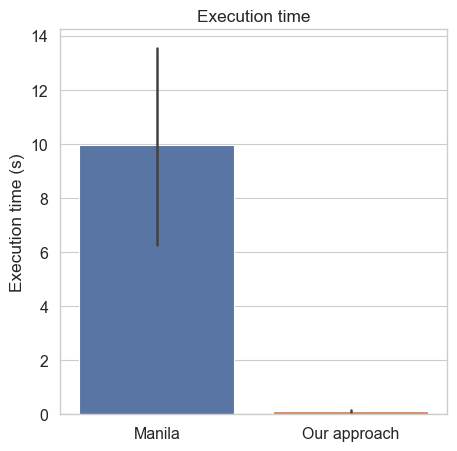

In [102]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=full, x="approach", y="time", hue="approach", ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("")
plt.title("Execution time")
plt.savefig("time.png", dpi=300, bbox_inches="tight")
plt.show()

## Prediction comparison

In [103]:
def map_values(x):
  if x > 0.2:
    return 1
  else: 
    return 0

manila = pd.DataFrame()
for file in os.listdir('manila_baseline/manila_results/'):
  manila = pd.concat([manila, pd.read_csv(f'manila_baseline/manila_results/{file}', index_col=0)[['stat_par', 'eq_odds', 'ao']]])
manila = manila.map(map_values)

In [104]:
our = pd.DataFrame()
for file in os.listdir('our_approach/our_approach_results/'):
    our = pd.concat(
        [
            our,
            pd.read_csv(f"our_approach/our_approach_results/{file}", index_col=0)
        ]
    )

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
print('Statistical parity', accuracy_score(manila['stat_par'], our['0']))

Statistical parity 0.34782608695652173


In [107]:
print("Equal opportunity", accuracy_score(manila["eq_odds"], our["1"]))

Equal opportunity 0.6086956521739131


In [109]:
print("Average odds", accuracy_score(manila["ao"], our["2"]))

Average odds 0.6521739130434783


## Aequitas

In [112]:
aequitas = pd.DataFrame()
for file in os.listdir('aequitas/aequitas_results/'):
    aequitas = pd.concat(
        [
            aequitas,
            pd.read_csv(f"aequitas/aequitas_results/{file}", index_col=0)[['tpr', 'fpr']]
        ]
    )
aequitas['ao'] = aequitas['tpr'] - aequitas['fpr']

In [117]:
aequitas = aequitas.loc[0]
aequitas = aequitas.map(map_values)